In [ ]:
#신일호 빅데이터 분석 프로젝트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/heart_2020_cleaned.csv')
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [ ]:
df.shape #319795개의 데이터,18개의 변수

(319795, 18)

## **※ ID변수 체크**

In [ ]:
df.info() #ID변수가 존재하지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
##아래 주석처리된 코드는 중복된 레코드를 삭제하는 코드
##ID변수가 없어 중복된 레코드들을 삭제하는 방법이 있으나
##데이터 셋의 설명변수 특성상 중복 가능성이 있다고 판단하여 중복 레코드를 삭제하지 않음

# #ID변수의 결측값 및 중복을 체크하는 대신 중복된 레코드(행)을 체크
# df.duplicated().sum()
# #중복된 레코드를 삭제
# df.drop_duplicates(inplace=True)
# df.shape

### **※ 타겟변수 생성 및 비율 점검**

In [ ]:
#타겟변수 HeartDisease, 변수의 값이 Yes or No이므로 object타입
df['HeartDisease'].dtype

dtype('O')

In [ ]:
#결측값 확인 -> 없음
df['HeartDisease'].isnull().sum()

0

In [ ]:
#타겟변수 개수 확인
df['HeartDisease'].value_counts(dropna=False)

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [ ]:
#타겟변수 비율 확인
df['HeartDisease'].value_counts(dropna=False, normalize=True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [ ]:
#변수 확인
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
#Yes or No의 값을 가진 타겟변수를 1과 0의 값으로 인코딩
df['HeartDisease_encoded'] = OrdinalEncoder().fit_transform(df['HeartDisease'].values.reshape(-1,1))
df.groupby(['HeartDisease', 'HeartDisease_encoded']).size()

HeartDisease  HeartDisease_encoded
No            0.0                     292422
Yes           1.0                      27373
dtype: int64

In [ ]:
#HeartDisease_encoded 변수가 새로 생김
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_encoded'],
      dtype='object')

In [ ]:
#편의를 위해 타겟 변수의 이름을 HeartDisease_encoded에서 HeartDisease로 바꾸고 맨 앞의 열로 가져옴
df.drop(['HeartDisease'], axis=1, inplace=True)
df.rename(columns={'HeartDisease_encoded': 'HeartDisease'}, inplace=True)
df = df.reindex(columns=['HeartDisease'] + list(df.columns.drop('HeartDisease')))
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0.0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0.0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


## **※ 기타 데이터 처리**

In [ ]:
#AgeCategory가 숫자-숫자 or 80-older 형식으로 돼있다.AgeCategory가 연령을 14단계의 범위로 나눠놓은 것이라 본 프로젝트에서는 범주형 변수로 처리했다.
#만약 Age를 구간변수로 처리하려면 아래의 주석처리된 코드를 이용하여 바꿀 수도 있다.

# if 'AgeCategory' in df.columns:
#    df['AgeCategory'] = df['AgeCategory'].replace('80-older', 80)  # '80-older'를 80으로 변경
#    df['AgeCategory'] = df['AgeCategory'].apply(lambda x: np.mean([int(val) for val in x.split('-')]))  # 숫자-숫자 형식인 경우 평균값으로 변경

In [ ]:
#구간변수 저장
cols_i = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
df_i = df[cols_i]
df_i.dtypes

BMI               float64
PhysicalHealth    float64
MentalHealth      float64
SleepTime         float64
dtype: object

In [ ]:
#구간변수 결측값 확인 -> 없음
df_i.isnull().sum()

BMI               0
PhysicalHealth    0
MentalHealth      0
SleepTime         0
dtype: int64

In [ ]:
#범주형 변수 저장
cols_c = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
df_c = df[cols_c]
df_c.dtypes

Smoking             object
AlcoholDrinking     object
Stroke              object
DiffWalking         object
Sex                 object
AgeCategory         object
Race                object
Diabetic            object
PhysicalActivity    object
GenHealth           object
Asthma              object
KidneyDisease       object
SkinCancer          object
dtype: object

In [ ]:
#범주형 변수 결측값 확인 -> 없음
df_c.isnull().sum()

Smoking             0
AlcoholDrinking     0
Stroke              0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## **※ 결측값 50% 초과 변수 제거**

In [ ]:
#결측값 확인 -> 없음
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
#모든 열 결측값 확인 -> 없음
df.isna().any()[lambda x: x]

Series([], dtype: bool)

## **※ 구간변수 요약 통계 및 검토**

In [ ]:
#구간변수 요약 통계
df_i.describe().round(2)

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.00,319795.00,319795.00,319795.00
mean,28.33,3.37,3.90,7.10
std,6.36,7.95,7.96,1.44
min,12.02,0.00,0.00,1.00
25%,24.03,0.00,0.00,6.00
50%,27.34,0.00,0.00,7.00
75%,31.42,2.00,3.00,8.00
max,94.85,30.00,30.00,24.00


In [ ]:
#왜도 -> +-3 범위 안에 있으므로 정규분포에서 많이 벗어나지 않음
df_i.skew()

BMI               1.332431
PhysicalHealth    2.603973
MentalHealth      2.331112
SleepTime         0.679035
dtype: float64

In [ ]:
#첨도 -> +-10 범위 안에 있으므로 정규분포에서 많이 벗어나지 않음
df_i.kurtosis()

BMI               3.890043
PhysicalHealth    5.528450
MentalHealth      4.403937
SleepTime         7.854869
dtype: float64

## **※ 이상값 제거**

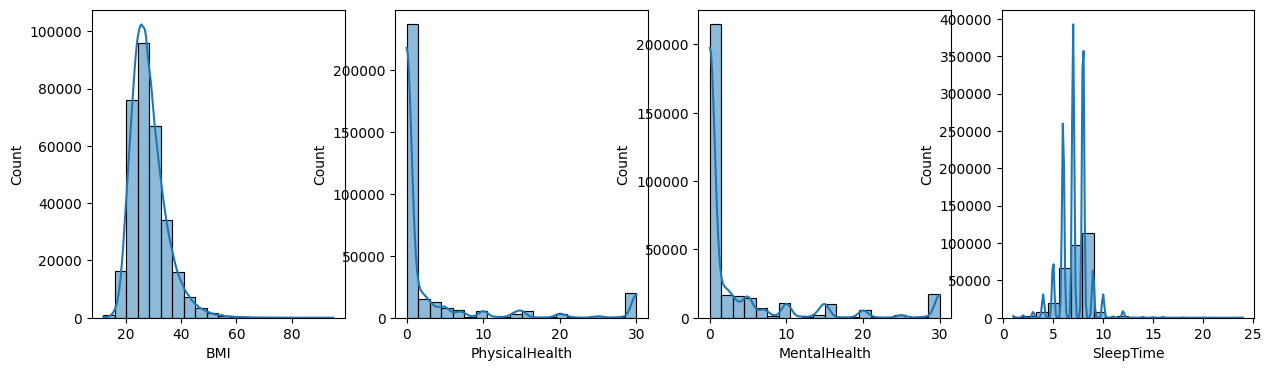

In [ ]:
#이상값 제거 전 히스토그램
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="BMI", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="PhysicalHealth", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="MentalHealth", kde=True, bins=20)
sns.histplot(ax=axes[3], data=df, x="SleepTime", kde=True, bins=20)
plt.show();


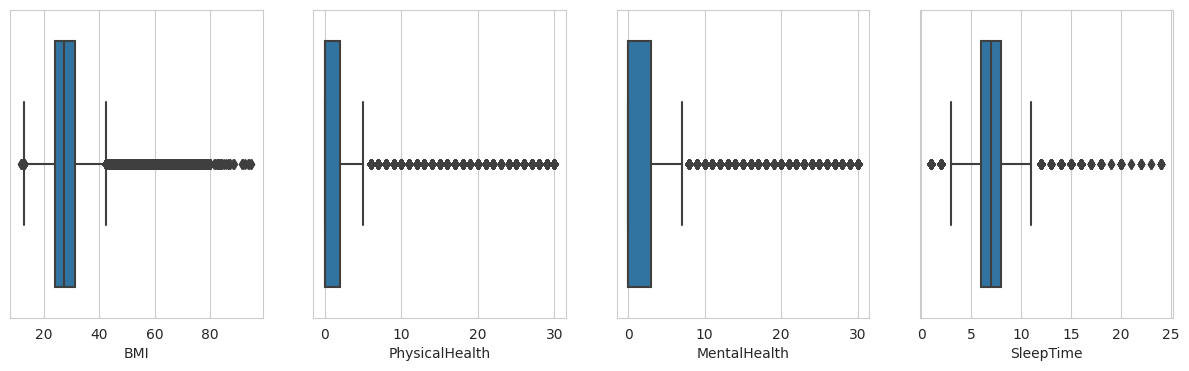

In [ ]:
#박스 플롯
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.boxplot(ax=axes[0], x = 'BMI', data = df)
sns.boxplot(ax=axes[1], x = 'PhysicalHealth', data = df)
sns.boxplot(ax=axes[2], x = 'MentalHealth', data = df);
sns.boxplot(ax=axes[3], x = 'SleepTime', data = df);
plt.show();

In [ ]:
#3.0 IQR을 적용
Q1 = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].quantile(0.25)
Q3 = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BMI               7.39
PhysicalHealth    2.00
MentalHealth      3.00
SleepTime         2.00
dtype: float64


In [ ]:
Lower = Q1-3.0*IQR
Lower

BMI               1.86
PhysicalHealth   -6.00
MentalHealth     -9.00
SleepTime         0.00
dtype: float64

In [ ]:
Upper = Q3+3.0*IQR
Upper

BMI               53.59
PhysicalHealth     8.00
MentalHealth      12.00
SleepTime         14.00
dtype: float64

In [ ]:
#Lower보다 낮은 값은 존재하지 않지만 Upper보다 높은 값은 존재
df[cols_i].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
#Upper보다 높은 이상값들을 제거하고 df1으로 저장, 이상값 제거 후 데이터 수 319795->253116
c1 = df['BMI'] <= 53.59
c2 = df['PhysicalHealth'] <= 8.00
c3 = df['MentalHealth'] <= 12.00
c4 = df['SleepTime'] <= 14.00
df1 = df[c1 & c2 & c3 & c4]
df1.shape

(253116, 18)

## **※ 상관관계 검토**

In [ ]:
#구간변수 간 상관계수 -> 모두 0.7보다 낮으므로 문제가 없음
round(df1[cols_i].corr(), 2)

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.00,0.05,0.00,-0.05
PhysicalHealth,0.05,1.00,0.14,-0.03
MentalHealth,0.00,0.14,1.00,-0.06
SleepTime,-0.05,-0.03,-0.06,1.00


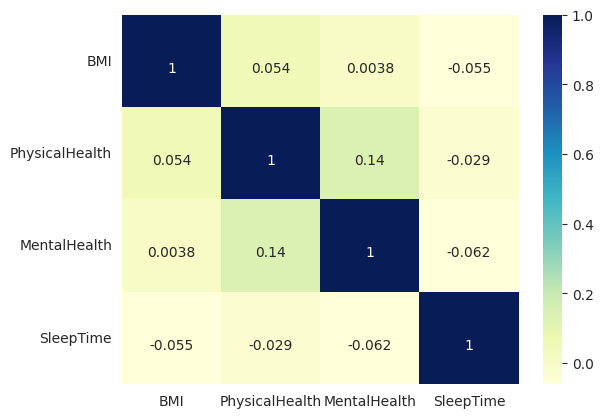

In [ ]:
corr = df1[cols_i].corr()
annot_kws = {"ha": 'center',"va": 'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws, cmap="YlGnBu");

## **※ t-검정**

In [ ]:
#구간변수 cols_i = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
#모든 구간변수의 pvalue < 0.05이므로 두 그룹의 평균이 같다는 귀무가설을 기각
for variable in cols_i:
    data_1 = df1[df1['HeartDisease'] == 1][variable]
    data_0 = df1[df1['HeartDisease'] == 0][variable]
    print(f"{variable}: {stats.ttest_ind(data_1, data_0)}")
    print("------")

BMI: Ttest_indResult(statistic=21.5208010421686, pvalue=1.2297378314638942e-102)
------
PhysicalHealth: Ttest_indResult(statistic=27.3628570433716, pvalue=1.3214816107819437e-164)
------
MentalHealth: Ttest_indResult(statistic=-20.428638987106268, pvalue=1.1059745755458137e-92)
------
SleepTime: Ttest_indResult(statistic=11.1589269114179, pvalue=6.57839597284694e-29)
------


## **※ 구간변수 시각화**

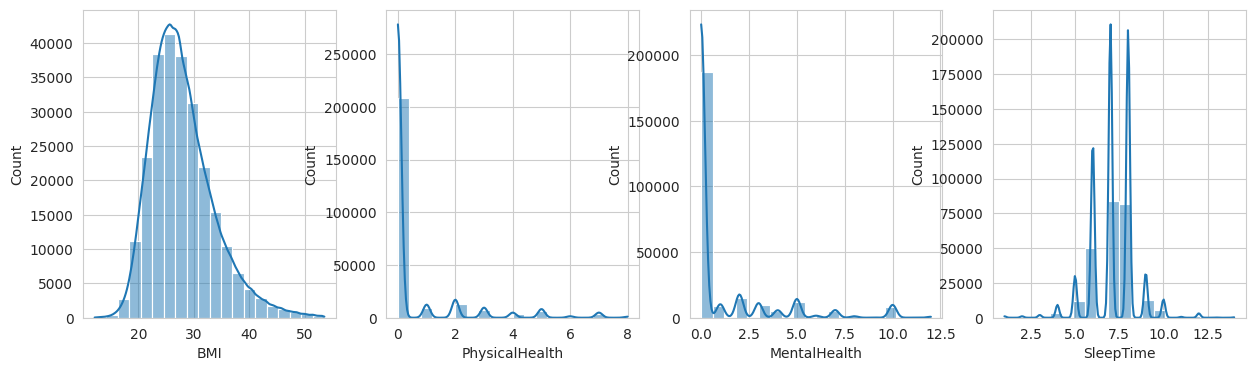

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(ax=axes[0], data=df1, x="BMI", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df1, x="PhysicalHealth", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df1, x="MentalHealth", kde=True, bins=20)
sns.histplot(ax=axes[3], data=df1, x="SleepTime", kde=True, bins=20)
plt.show();

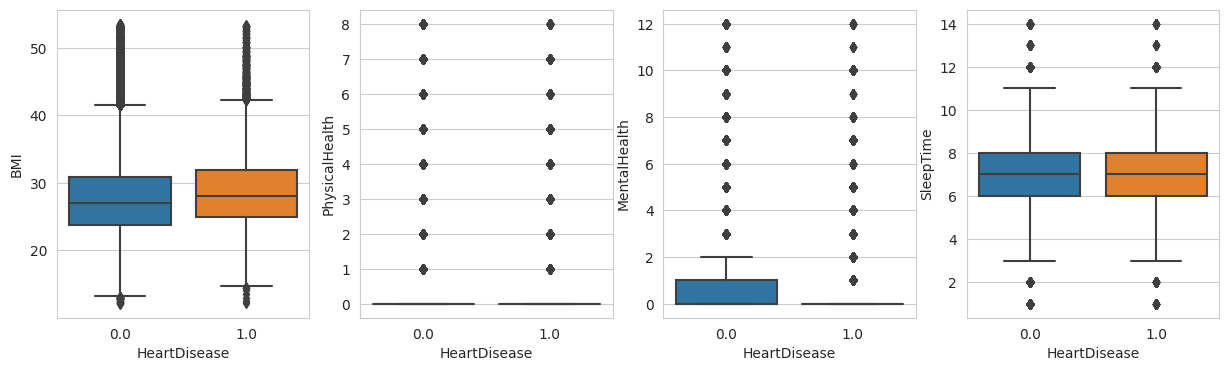

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.boxplot(ax=axes[0], x = 'HeartDisease', y = 'BMI', data = df1)
sns.boxplot(ax=axes[1], x = 'HeartDisease', y = 'PhysicalHealth', data = df1);
sns.boxplot(ax=axes[2], x = 'HeartDisease', y = 'MentalHealth', data = df1);
sns.boxplot(ax=axes[3], x = 'HeartDisease', y = 'SleepTime', data = df1);
plt.show();

## **※ 범주형 변수 도수분포표 검토**

In [ ]:
#범주형 변수 ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
#'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
#'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

#변수의 개수가 많아 Sex, AgeCategory, Race, Diabetic, GenHealth 5개의 변수에 대해 진행

#Sex
df1['Sex'].value_counts(dropna=False)

Female    127724
Male      125392
Name: Sex, dtype: int64

In [ ]:
pd.crosstab(df1['Sex'], columns='count')

col_0,count
Sex,
Female,127724
Male,125392


In [ ]:
pd.crosstab(df1['Sex'], columns='ratio', normalize=True)

col_0,ratio
Sex,
Female,0.504607
Male,0.495393


In [ ]:
pd.crosstab(df1['Sex'], df1['HeartDisease'])

HeartDisease,0.0,1.0
Sex,,
Female,121339,6385
Male,114192,11200


In [ ]:
pd.crosstab(df1['Sex'], df1['HeartDisease'], normalize=True)

HeartDisease,0.0,1.0
Sex,,
Female,0.479381,0.025226
Male,0.451145,0.044248


In [ ]:
#AgeCategory
df1['AgeCategory'].value_counts(dropna=False)

65-69          27475
60-64          26285
70-74          25115
55-59          23083
50-54          19808
80 or older    19352
45-49          17335
75-79          17258
40-44          16772
35-39          16310
18-24          16290
30-34          14824
25-29          13209
Name: AgeCategory, dtype: int64

In [ ]:
pd.crosstab(df1['AgeCategory'], columns='count')

col_0,count
AgeCategory,
18-24,16290
25-29,13209
30-34,14824
35-39,16310
40-44,16772
45-49,17335
50-54,19808
55-59,23083
60-64,26285


In [ ]:
pd.crosstab(df1['AgeCategory'], columns='ratio', normalize=True)

col_0,ratio
AgeCategory,
18-24,0.064358
25-29,0.052186
30-34,0.058566
35-39,0.064437
40-44,0.066262
45-49,0.068486
50-54,0.078257
55-59,0.091195
60-64,0.103846


In [ ]:
pd.crosstab(df1['AgeCategory'], df1['HeartDisease'])

HeartDisease,0.0,1.0
AgeCategory,,
18-24,16210,80
25-29,13130,79
30-34,14693,131
35-39,16147,163
40-44,16543,229
45-49,16960,375
50-54,19103,705
55-59,21908,1175
60-64,24314,1971


In [ ]:
pd.crosstab(df1['AgeCategory'], df1['HeartDisease'], normalize=True)

HeartDisease,0.0,1.0
AgeCategory,,
18-24,0.064042,0.000316
25-29,0.051873,0.000312
30-34,0.058048,0.000518
35-39,0.063793,0.000644
40-44,0.065357,0.000905
45-49,0.067005,0.001482
50-54,0.075471,0.002785
55-59,0.086553,0.004642
60-64,0.096059,0.007787


In [ ]:
#Race
df1['Race'].value_counts(dropna=False)

White                             195176
Hispanic                           21508
Black                              17578
Other                               8022
Asian                               7106
American Indian/Alaskan Native      3726
Name: Race, dtype: int64

In [ ]:
pd.crosstab(df1['Race'], columns='count')

col_0,count
Race,
American Indian/Alaskan Native,3726
Asian,7106
Black,17578
Hispanic,21508
Other,8022
White,195176


In [ ]:
pd.crosstab(df1['Race'], columns='ratio', normalize=True)

col_0,ratio
Race,
American Indian/Alaskan Native,0.014721
Asian,0.028074
Black,0.069446
Hispanic,0.084973
Other,0.031693
White,0.771093


In [ ]:
pd.crosstab(df1['Race'], df1['HeartDisease'])

HeartDisease,0.0,1.0
Race,,
American Indian/Alaskan Native,3444,282
Asian,6906,200
Black,16579,999
Hispanic,20667,841
Other,7559,463
White,180376,14800


In [ ]:
pd.crosstab(df1['Race'], df1['HeartDisease'], normalize=True)

HeartDisease,0.0,1.0
Race,,
American Indian/Alaskan Native,0.013606,0.001114
Asian,0.027284,0.000790
Black,0.065500,0.003947
Hispanic,0.081650,0.003323
Other,0.029864,0.001829
White,0.712622,0.058471


In [ ]:
#Diabetic
df1['Diabetic'].value_counts(dropna=False)

No                         218434
Yes                         27712
No, borderline diabetes      5038
Yes (during pregnancy)       1932
Name: Diabetic, dtype: int64

In [ ]:
pd.crosstab(df1['Diabetic'], columns='count')

col_0,count
Diabetic,
No,218434
"No, borderline diabetes",5038
Yes,27712
Yes (during pregnancy),1932


In [ ]:
pd.crosstab(df1['Diabetic'], columns='ratio', normalize=True)

col_0,ratio
Diabetic,
No,0.862980
"No, borderline diabetes",0.019904
Yes,0.109483
Yes (during pregnancy),0.007633


In [ ]:
pd.crosstab(df1['Diabetic'], df1['HeartDisease'])

HeartDisease,0.0,1.0
Diabetic,,
No,206462,11972
"No, borderline diabetes",4541,497
Yes,22659,5053
Yes (during pregnancy),1869,63


In [ ]:
pd.crosstab(df1['Diabetic'], df1['HeartDisease'], normalize=True)

HeartDisease,0.0,1.0
Diabetic,,
No,0.815681,0.047298
"No, borderline diabetes",0.017940,0.001964
Yes,0.089520,0.019963
Yes (during pregnancy),0.007384,0.000249


In [ ]:
#GenHealth
df1['GenHealth'].value_counts(dropna=False)

Very good    100412
Good          73215
Excellent     61598
Fair          16551
Poor           1340
Name: GenHealth, dtype: int64

In [ ]:
pd.crosstab(df1['GenHealth'], columns='count')

col_0,count
GenHealth,
Excellent,61598
Fair,16551
Good,73215
Poor,1340
Very good,100412


In [ ]:
pd.crosstab(df1['GenHealth'], columns='ratio', normalize=True)

col_0,ratio
GenHealth,
Excellent,0.243359
Fair,0.065389
Good,0.289255
Poor,0.005294
Very good,0.396703


In [ ]:
pd.crosstab(df1['GenHealth'], df1['HeartDisease'])

HeartDisease,0.0,1.0
GenHealth,,
Excellent,60263,1335
Fair,13155,3396
Good,65577,7638
Poor,897,443
Very good,95639,4773


In [ ]:
pd.crosstab(df1['GenHealth'], df1['HeartDisease'], normalize=True)

HeartDisease,0.0,1.0
GenHealth,,
Excellent,0.238085,0.005274
Fair,0.051972,0.013417
Good,0.259079,0.030176
Poor,0.003544,0.001750
Very good,0.377847,0.018857


In [ ]:
#모든 범주형 변수 요약통계
df1[cols_c].describe()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,253116,253116,253116,253116,253116,253116,253116,253116,253116,253116,253116,253116,253116
unique,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,155985,236479,246001,232157,127724,27475,195176,218434,206179,100412,224837,246231,229741


## **※ 범주형 변수 시각화**

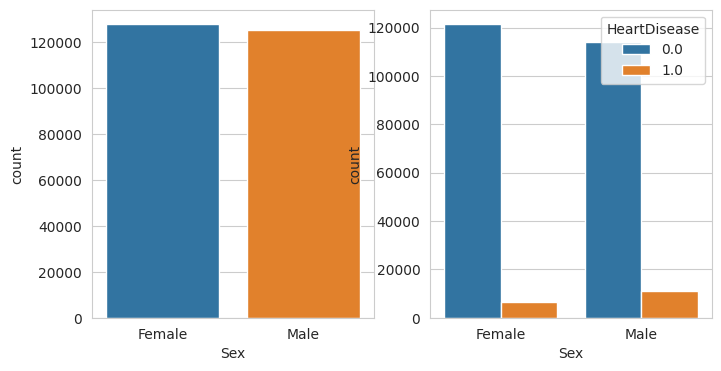

In [ ]:
#범주형 변수의 수가 많아 Sex, Smoking, Stroke, Asthma,KidneyDisease에 대해서만 진행
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(ax=axes[0], x='Sex', data=df1)
sns.countplot(ax=axes[1], x='Sex', hue='HeartDisease', data=df1);
plt.show()

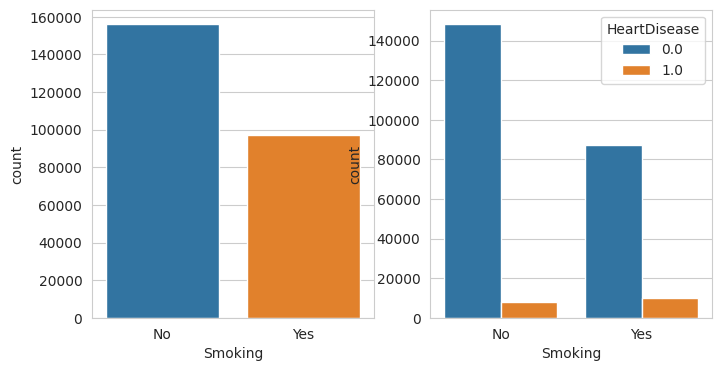

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(ax=axes[0], x='Smoking', data=df1)
sns.countplot(ax=axes[1], x='Smoking', hue='HeartDisease', data=df1);
plt.show()

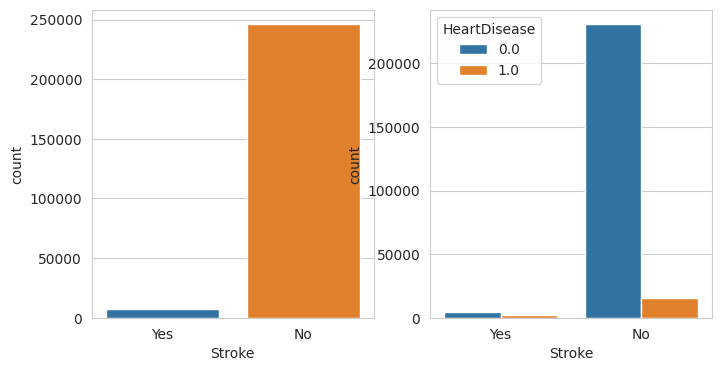

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(ax=axes[0], x='Stroke', data=df1)
sns.countplot(ax=axes[1], x='Stroke', hue='HeartDisease', data=df1);
plt.show()

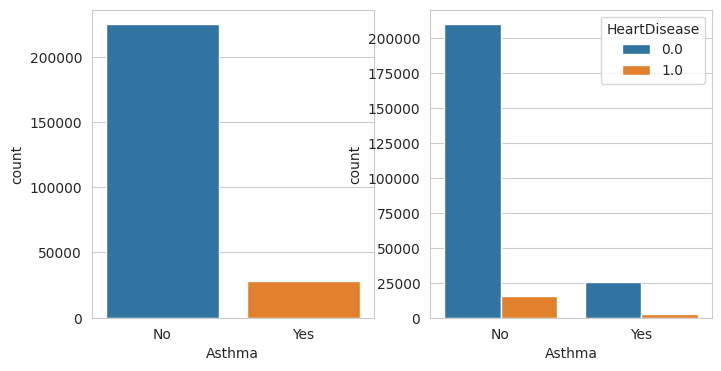

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(ax=axes[0], x='Asthma', data=df1)
sns.countplot(ax=axes[1], x='Asthma', hue='HeartDisease', data=df1);
plt.show()

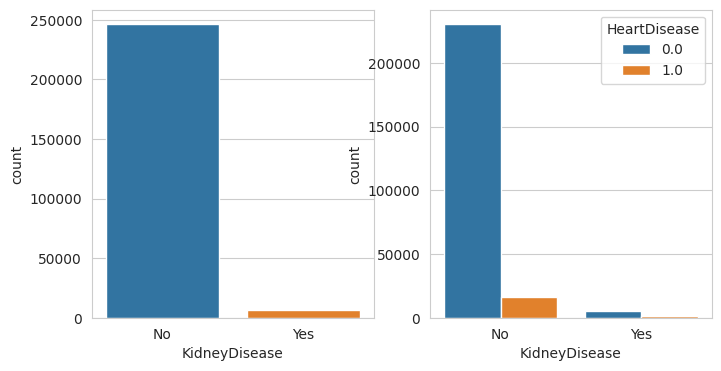

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(ax=axes[0], x='KidneyDisease', data=df1)
sns.countplot(ax=axes[1], x='KidneyDisease', hue='HeartDisease', data=df1);
plt.show()

## **※ 인코딩**

In [ ]:
#범주형 변수 ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
#'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
#'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for col in cols_c:
    print("")
    print("---- %s ----" % col)
    print(df1[col].value_counts(dropna=False, normalize=True))


---- Smoking ----
No     0.616259
Yes    0.383741
Name: Smoking, dtype: float64

---- AlcoholDrinking ----
No     0.934271
Yes    0.065729
Name: AlcoholDrinking, dtype: float64

---- Stroke ----
No     0.97189
Yes    0.02811
Name: Stroke, dtype: float64

---- DiffWalking ----
No     0.917196
Yes    0.082804
Name: DiffWalking, dtype: float64

---- Sex ----
Female    0.504607
Male      0.495393
Name: Sex, dtype: float64

---- AgeCategory ----
65-69          0.108547
60-64          0.103846
70-74          0.099223
55-59          0.091195
50-54          0.078257
80 or older    0.076455
45-49          0.068486
75-79          0.068182
40-44          0.066262
35-39          0.064437
18-24          0.064358
30-34          0.058566
25-29          0.052186
Name: AgeCategory, dtype: float64

---- Race ----
White                             0.771093
Hispanic                          0.084973
Black                             0.069446
Other                             0.031693
Asian               

In [ ]:
#범주형 변수들을 인코딩
df2 = df1.copy()

for variable in cols_c:
    print("-----")
    encoded_variable = variable + '_encoded'
    df2[encoded_variable] = OrdinalEncoder().fit_transform(df2[variable].values.reshape(-1, 1))
    print(df2.groupby([variable, encoded_variable]).size())

-----
Smoking  Smoking_encoded
No       0.0                155985
Yes      1.0                 97131
dtype: int64
-----
AlcoholDrinking  AlcoholDrinking_encoded
No               0.0                        236479
Yes              1.0                         16637
dtype: int64
-----
Stroke  Stroke_encoded
No      0.0               246001
Yes     1.0                 7115
dtype: int64
-----
DiffWalking  DiffWalking_encoded
No           0.0                    232157
Yes          1.0                     20959
dtype: int64
-----
Sex     Sex_encoded
Female  0.0            127724
Male    1.0            125392
dtype: int64
-----
AgeCategory  AgeCategory_encoded
18-24        0.0                    16290
25-29        1.0                    13209
30-34        2.0                    14824
35-39        3.0                    16310
40-44        4.0                    16772
45-49        5.0                    17335
50-54        6.0                    19808
55-59        7.0                    23083
60-6

In [ ]:
df2.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Smoking_encoded',
       'AlcoholDrinking_encoded', 'Stroke_encoded', 'DiffWalking_encoded',
       'Sex_encoded', 'AgeCategory_encoded', 'Race_encoded',
       'Diabetic_encoded', 'PhysicalActivity_encoded', 'GenHealth_encoded',
       'Asthma_encoded', 'KidneyDisease_encoded', 'SkinCancer_encoded'],
      dtype='object')

In [ ]:
df2.shape

(253116, 31)

In [ ]:
#인코딩 되기 전의 범주형 변수들을 제거
for variable in cols_c:
    df2.drop(variable, axis=1, inplace=True)
df2.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'Smoking_encoded', 'AlcoholDrinking_encoded', 'Stroke_encoded',
       'DiffWalking_encoded', 'Sex_encoded', 'AgeCategory_encoded',
       'Race_encoded', 'Diabetic_encoded', 'PhysicalActivity_encoded',
       'GenHealth_encoded', 'Asthma_encoded', 'KidneyDisease_encoded',
       'SkinCancer_encoded'],
      dtype='object')

In [ ]:
#df2.to_csv('/content/drive/MyDrive/Colab Notebooks/project/HA_2071506_project.csv', index=False)

## **※타겟변수 비율 점검 및 언더샘플링, 트리모델 실행 및 성능평가**

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz

In [ ]:
df2.shape

(253116, 18)

In [ ]:
data = df2.drop(['HeartDisease'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df2['HeartDisease']                # 타겟변수만 target에 저장
data.shape

(253116, 17)

In [ ]:
target.shape

(253116,)

In [ ]:
df['HeartDisease'].value_counts(dropna = False, normalize = False)

0.0    292422
1.0     27373
Name: HeartDisease, dtype: int64

In [ ]:
df['HeartDisease'].value_counts(dropna = False, normalize = True)

0.0    0.914405
1.0    0.085595
Name: HeartDisease, dtype: float64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=1)
data_under, target_under = undersample.fit_resample(data, target)

In [ ]:
target_under.value_counts(dropna=True)

0.0    52807
1.0    17585
Name: HeartDisease, dtype: int64

In [ ]:
target_under.value_counts(dropna=True, normalize=True).round(2)

0.0    0.75
1.0    0.25
Name: HeartDisease, dtype: float64

In [ ]:
# 50:50 비율로 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_under, target_under, test_size=0.5, random_state=1, stratify = target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (35196, 17)
X_test shape: (35196, 17)


In [ ]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (35196,)
y_test shape: (35196,)


In [ ]:
y_train.value_counts(dropna=True, normalize=True)

0.0    0.750199
1.0    0.249801
Name: HeartDisease, dtype: float64

In [ ]:
y_train.value_counts(dropna=True)

0.0    26404
1.0     8792
Name: HeartDisease, dtype: int64

## **※트리모델 실행 및 성능 평가**

In [ ]:
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=1)   # Classifier로 DecisionTreeClassifer 지정
model = tree.fit(X_train, y_train)   # Clssifier를 트레이닝 데이터셋에서 학습시킴
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train, y_train)))
print("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:0.99679
Accuracy(GINI) on test set:0.72324


In [ ]:
# Decision Tree 모델 (Gini 기준)
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=5)

params = {'criterion':['gini','entropy'],'max_depth': range(1,21)} # 2 X 20 = 40

grid_tree = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,verbose=1)
grid_tree.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy:0.79268
GridSearchCV best parameter: {'criterion': 'gini', 'max_depth': 8}


In [ ]:
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.78915


In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.81899


In [ ]:
print ("Feature importances:")
print (best_clf.feature_importances_.round(4))

Feature importances:
[3.030e-02 8.100e-03 2.700e-03 1.260e-02 1.550e-02 1.900e-03 9.250e-02
 9.700e-03 9.360e-02 5.132e-01 1.000e-02 2.640e-02 1.600e-03 1.671e-01
 3.000e-03 1.140e-02 3.000e-04]


In [ ]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 4), index=feature_names, columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리

,Feature_importances
AgeCategory_encoded,0.5132
GenHealth_encoded,0.1671
Sex_encoded,0.0936
Stroke_encoded,0.0925
BMI,0.0303
Diabetic_encoded,0.0264
Smoking_encoded,0.0155
SleepTime,0.0126
KidneyDisease_encoded,0.0114
Race_encoded,0.0100


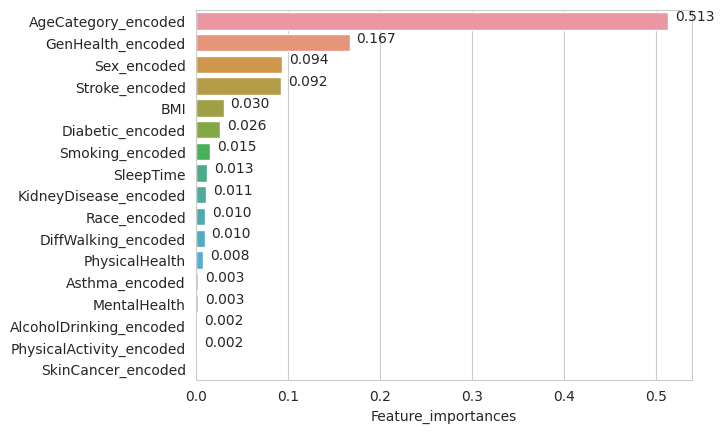

In [ ]:
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1), xytext=(5, 10), textcoords='offset points')

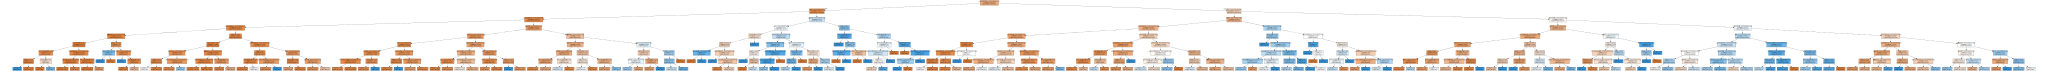

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(best_clf, out_file = "tree.dot", feature_names = list(data.columns), impurity = False , filled = True )

# tree.dot을 graphviz 기능을 통해 디스플레이.
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## **※더미변수 생성**

In [ ]:
# 범주형 변수중에서 값으로 0과 1만 가지는(이미 더미 변수화 되어 있는) 변수를 제외하고서 cols_d에 저장

cols_d = ['AgeCategory_encoded', 'Race_encoded', 'Diabetic_encoded', 'GenHealth_encoded']

In [ ]:
df_d = pd.get_dummies(df2, columns=cols_d)

In [ ]:
df_d.head(3)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_encoded,AlcoholDrinking_encoded,Stroke_encoded,DiffWalking_encoded,Sex_encoded,PhysicalActivity_encoded,Asthma_encoded,KidneyDisease_encoded,SkinCancer_encoded,AgeCategory_encoded_0.0,AgeCategory_encoded_1.0,AgeCategory_encoded_2.0,AgeCategory_encoded_3.0,AgeCategory_encoded_4.0,AgeCategory_encoded_5.0,AgeCategory_encoded_6.0,AgeCategory_encoded_7.0,AgeCategory_encoded_8.0,AgeCategory_encoded_9.0,AgeCategory_encoded_10.0,AgeCategory_encoded_11.0,AgeCategory_encoded_12.0,Race_encoded_0.0,Race_encoded_1.0,Race_encoded_2.0,Race_encoded_3.0,Race_encoded_4.0,Race_encoded_5.0,Diabetic_encoded_0.0,Diabetic_encoded_1.0,Diabetic_encoded_2.0,Diabetic_encoded_3.0,GenHealth_encoded_0.0,GenHealth_encoded_1.0,GenHealth_encoded_2.0,GenHealth_encoded_3.0,GenHealth_encoded_4.0
1,0.0,20.34,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
3,0.0,24.21,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
5,1.0,28.87,6.0,0.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
df_d.shape

(253116, 42)

In [ ]:
list(df_d.columns)

['HeartDisease',
 'BMI',
 'PhysicalHealth',
 'MentalHealth',
 'SleepTime',
 'Smoking_encoded',
 'AlcoholDrinking_encoded',
 'Stroke_encoded',
 'DiffWalking_encoded',
 'Sex_encoded',
 'PhysicalActivity_encoded',
 'Asthma_encoded',
 'KidneyDisease_encoded',
 'SkinCancer_encoded',
 'AgeCategory_encoded_0.0',
 'AgeCategory_encoded_1.0',
 'AgeCategory_encoded_2.0',
 'AgeCategory_encoded_3.0',
 'AgeCategory_encoded_4.0',
 'AgeCategory_encoded_5.0',
 'AgeCategory_encoded_6.0',
 'AgeCategory_encoded_7.0',
 'AgeCategory_encoded_8.0',
 'AgeCategory_encoded_9.0',
 'AgeCategory_encoded_10.0',
 'AgeCategory_encoded_11.0',
 'AgeCategory_encoded_12.0',
 'Race_encoded_0.0',
 'Race_encoded_1.0',
 'Race_encoded_2.0',
 'Race_encoded_3.0',
 'Race_encoded_4.0',
 'Race_encoded_5.0',
 'Diabetic_encoded_0.0',
 'Diabetic_encoded_1.0',
 'Diabetic_encoded_2.0',
 'Diabetic_encoded_3.0',
 'GenHealth_encoded_0.0',
 'GenHealth_encoded_1.0',
 'GenHealth_encoded_2.0',
 'GenHealth_encoded_3.0',
 'GenHealth_encoded_4.0'

In [ ]:
cols_b = ['AgeCategory_encoded_0.0', 'Race_encoded_1.0', 'Diabetic_encoded_0.0', 'GenHealth_encoded_0.0']

df_d.drop(cols_b, axis=1, inplace=True)
df_d.shape

(253116, 38)

In [ ]:
#df_d.to_csv('/content/drive/MyDrive/Colab Notebooks/project/HA_2071506_project_dummy.csv', index=False)

In [ ]:
df_d.dtypes

HeartDisease                float64
BMI                         float64
PhysicalHealth              float64
MentalHealth                float64
SleepTime                   float64
Smoking_encoded             float64
AlcoholDrinking_encoded     float64
Stroke_encoded              float64
DiffWalking_encoded         float64
Sex_encoded                 float64
PhysicalActivity_encoded    float64
Asthma_encoded              float64
KidneyDisease_encoded       float64
SkinCancer_encoded          float64
AgeCategory_encoded_1.0       uint8
AgeCategory_encoded_2.0       uint8
AgeCategory_encoded_3.0       uint8
AgeCategory_encoded_4.0       uint8
AgeCategory_encoded_5.0       uint8
AgeCategory_encoded_6.0       uint8
AgeCategory_encoded_7.0       uint8
AgeCategory_encoded_8.0       uint8
AgeCategory_encoded_9.0       uint8
AgeCategory_encoded_10.0      uint8
AgeCategory_encoded_11.0      uint8
AgeCategory_encoded_12.0      uint8
Race_encoded_0.0              uint8
Race_encoded_2.0            

In [ ]:
#범주형 변수 ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
#'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
#'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
col_toC = ['HeartDisease', 'Smoking_encoded', 'AlcoholDrinking_encoded', 'Stroke_encoded', 'DiffWalking_encoded','Sex_encoded', 'AgeCategory_encoded_1.0',
           'AgeCategory_encoded_2.0', 'AgeCategory_encoded_3.0', 'AgeCategory_encoded_4.0', 'AgeCategory_encoded_5.0', 'AgeCategory_encoded_6.0', 'AgeCategory_encoded_7.0'
           , 'AgeCategory_encoded_8.0', 'AgeCategory_encoded_9.0', 'AgeCategory_encoded_10.0', 'AgeCategory_encoded_11.0', 'AgeCategory_encoded_12.0',
           'Race_encoded_0.0', 'Race_encoded_2.0', 'Race_encoded_3.0', 'Race_encoded_4.0', 'Race_encoded_5.0','Diabetic_encoded_1.0' ,'Diabetic_encoded_2.0'
           ,'Diabetic_encoded_3.0','PhysicalActivity_encoded', 'GenHealth_encoded_1.0' , 'GenHealth_encoded_2.0', 'GenHealth_encoded_3.0', 'GenHealth_encoded_4.0',
           'Asthma_encoded', 'KidneyDisease_encoded', 'SkinCancer_encoded']

df_d[col_toC] = df_d[col_toC].astype('category')   # cols에 저장된 변수들의 dtype을 category로 변경

In [ ]:
df_d.dtypes

HeartDisease                category
BMI                          float64
PhysicalHealth               float64
MentalHealth                 float64
SleepTime                    float64
Smoking_encoded             category
AlcoholDrinking_encoded     category
Stroke_encoded              category
DiffWalking_encoded         category
Sex_encoded                 category
PhysicalActivity_encoded    category
Asthma_encoded              category
KidneyDisease_encoded       category
SkinCancer_encoded          category
AgeCategory_encoded_1.0     category
AgeCategory_encoded_2.0     category
AgeCategory_encoded_3.0     category
AgeCategory_encoded_4.0     category
AgeCategory_encoded_5.0     category
AgeCategory_encoded_6.0     category
AgeCategory_encoded_7.0     category
AgeCategory_encoded_8.0     category
AgeCategory_encoded_9.0     category
AgeCategory_encoded_10.0    category
AgeCategory_encoded_11.0    category
AgeCategory_encoded_12.0    category
Race_encoded_0.0            category
R

## **※데이터 표준화**

In [ ]:
df_d['HeartDisease'].isnull().sum()

0

In [ ]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다.
numeric_cols = ['BMI','PhysicalHealth','MentalHealth', 'SleepTime']
df_num = df_d[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터프레임에 다시 변수명을 넣는다.
df_num_standard.columns = df_num.columns
df_num_standard.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.326940,-0.383279,-0.468416,-0.124916
1,-0.649325,-0.383279,-0.468416,-0.934872
2,0.166615,3.784651,-0.468416,3.924865
3,0.651626,3.089996,-0.468416,1.494996
4,-0.257113,-0.383279,-0.468416,-1.744828


In [ ]:
df_cat = df_d.drop(numeric_cols, axis=1) # 원래 데이터프레임 df에서 구간변수들을 제거하여 df_cat에 저장

In [ ]:
# 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
# index문제로 바로 concat하면 데이터프레임에 결측값이 추가되는 에러가 발생하여 인덱스 초기화 후 concat수행
df_num_standard.reset_index(drop=True, inplace=True)
df_cat.reset_index(drop=True, inplace=True)
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명을 나열

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'HeartDisease',
       'Smoking_encoded', 'AlcoholDrinking_encoded', 'Stroke_encoded',
       'DiffWalking_encoded', 'Sex_encoded', 'PhysicalActivity_encoded',
       'Asthma_encoded', 'KidneyDisease_encoded', 'SkinCancer_encoded',
       'AgeCategory_encoded_1.0', 'AgeCategory_encoded_2.0',
       'AgeCategory_encoded_3.0', 'AgeCategory_encoded_4.0',
       'AgeCategory_encoded_5.0', 'AgeCategory_encoded_6.0',
       'AgeCategory_encoded_7.0', 'AgeCategory_encoded_8.0',
       'AgeCategory_encoded_9.0', 'AgeCategory_encoded_10.0',
       'AgeCategory_encoded_11.0', 'AgeCategory_encoded_12.0',
       'Race_encoded_0.0', 'Race_encoded_2.0', 'Race_encoded_3.0',
       'Race_encoded_4.0', 'Race_encoded_5.0', 'Diabetic_encoded_1.0',
       'Diabetic_encoded_2.0', 'Diabetic_encoded_3.0', 'GenHealth_encoded_1.0',
       'GenHealth_encoded_2.0', 'GenHealth_encoded_3.0',
       'GenHealth_encoded_4.0'],
      dtype='object')

In [ ]:
#dfu_standard.to_csv('/content/drive/MyDrive/Colab Notebooks/project/HA_2071506_project_dummy_standard.csv', index=False)  # 병합한 데이터프레임을 csv 형태로 저장

## **※ 로지스틱 회귀 모델 실행 및 성능평가**

In [ ]:
#dfu_standard = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/HA_2071506_project_dummy_standard.csv')

In [ ]:
data = dfu_standard.drop(['HeartDisease'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = dfu_standard['HeartDisease']                # 타겟변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler    # RandomUnderSampler를 import
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=1)
                                                          # 타겟변수의 소수 클래스 및 다수 클래스를
                                                          # 1:3의 비율(=1/3)로 언더샘플링
data_under, target_under = undersample.fit_resample(data, target)
                                                          # data 및 target에 언더샘플링 적용

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=1, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (35196, 37)
X_test shape: (35196, 37)


In [ ]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# warning 제거하기 위해 penalty='none' -> penalty=None 변경
lr = LogisticRegression(solver='lbfgs',penalty=None,random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Logreg Training set score:0.80003
Logreg Test set score:0.79949


In [ ]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty=None,random_state=1,n_jobs=-1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':[None]}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

GridSearchCV max accuracy:0.79981
GridSearchCV best parameter: {'penalty': None, 'solver': 'saga'}


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.79955


In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.83926


In [ ]:
print('절편', np.round(best_clf.intercept_, 3))
print('회귀계수', np.round(best_clf.coef_, 3))

절편 [-5.423]
회귀계수 [[ 0.059  0.041  0.013 -0.012  0.362 -0.275  1.195  0.285  0.802 -0.023
   0.286  0.558  0.086  0.207  0.494  0.731  0.894  1.256  1.787  2.095
   2.377  2.636  2.958  3.149  3.488  0.466  0.043  0.219  0.177  0.409
   0.169  0.406  0.19   1.523  1.072  2.035  0.473]]


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names, columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1

,coef
AlcoholDrinking_encoded,-0.275
PhysicalActivity_encoded,-0.023
SleepTime,-0.012
MentalHealth,0.013
PhysicalHealth,0.041
Race_encoded_2.0,0.043
BMI,0.059
SkinCancer_encoded,0.086
Diabetic_encoded_1.0,0.169
Race_encoded_4.0,0.177


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
AgeCategory_encoded_12.0,32.721
AgeCategory_encoded_11.0,23.315
AgeCategory_encoded_10.0,19.264
AgeCategory_encoded_9.0,13.955
AgeCategory_encoded_8.0,10.768
AgeCategory_encoded_7.0,8.125
GenHealth_encoded_3.0,7.650
AgeCategory_encoded_6.0,5.972
GenHealth_encoded_1.0,4.585
AgeCategory_encoded_5.0,3.513


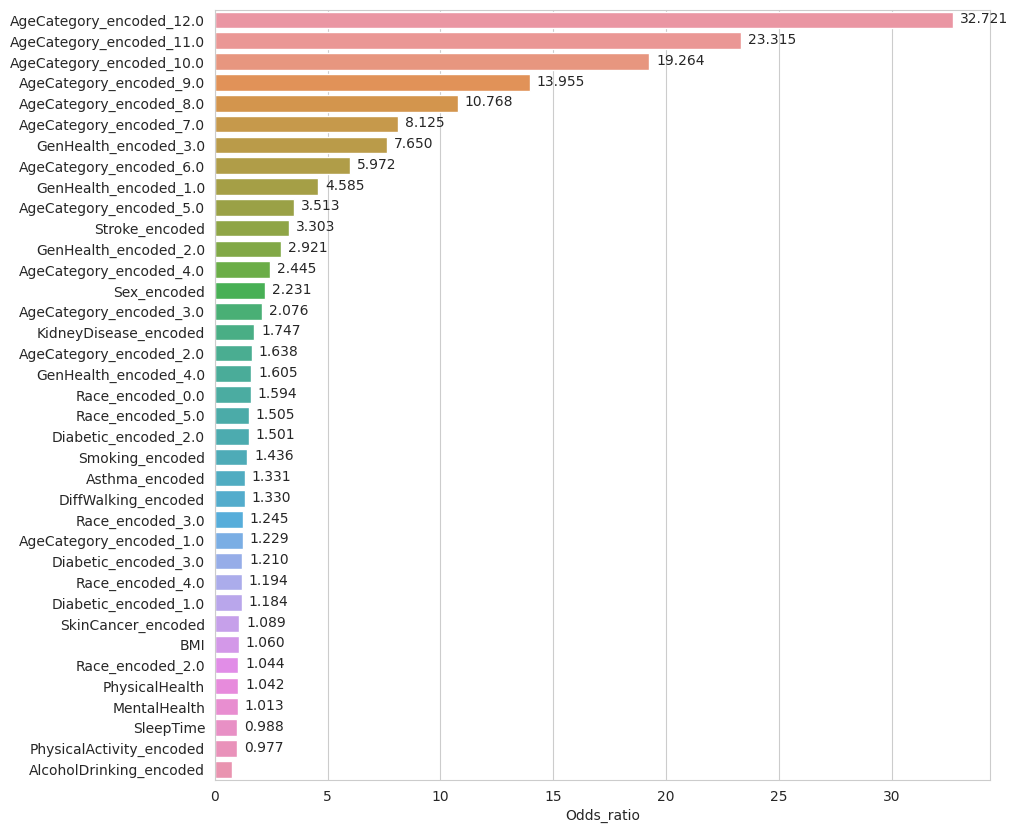

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 10))

ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),
                xytext=(5, 10), textcoords='offset points')

## **※신경망 모델**

In [ ]:
dfu_standard.shape

(253116, 38)

In [ ]:
#데이터가 많아 Grid Search 시간이 너무 오래걸림
#10000개의 데이터만 사용
sample_df = dfu_standard.sample(n=10000, random_state=1)
sample_df.shape

(10000, 38)

In [ ]:
sample_df['HeartDisease'].value_counts()

0.0    9321
1.0     679
Name: HeartDisease, dtype: int64

In [ ]:
data = sample_df.drop(['HeartDisease'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = sample_df['HeartDisease']                # 타겟변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler    # RandomUnderSampler를 import
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=1)
                                                          # 타겟변수의 소수 클래스 및 다수 클래스를
                                                          # 1:3의 비율(=1/3)로 언더샘플링
data_under, target_under = undersample.fit_resample(data, target)
                                                          # data 및 target에 언더샘플링 적용

In [ ]:
target_under.value_counts()

0.0    2039
1.0     679
Name: HeartDisease, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=1, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1359, 37)
X_test shape: (1359, 37)


In [ ]:
# Neural Network 모델 (Default 모델 with adam solver)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 1)
                       # convergence warinng을 회피하기 위해 max_iter = 2000으로 올려서 설정
clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

In [ ]:
print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train)))
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.99264
Neural Network Test set score:0.75938


In [ ]:
# alpha=0.0001이 default값임
# alpha=0.01 옵션: 이는 중간 정도의 regularization on weights를 의미
# alpha=1 옵션 추가: 이는 stronger regularization on weights를 의미

In [ ]:
# 신경망 기본 모델 (with adam solver)
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
          'activation':['tanh','relu', 'logistic']
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.80944
GridSearchCV best parameter: {'activation': 'logistic', 'alpha': 1, 'solver': 'lbfgs'}


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.77999


In [ ]:
# 신경망 기본 모델 (with adam solver)
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)

from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd', 'lbfgs', 'adam'],
          'alpha':[0.0001, 0.01, 1],
          'activation':['tanh','relu', 'logistic'],
          'hidden_layer_sizes': [(100,), (100,100)]
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.81090
GridSearchCV best parameter: {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.80132


In [ ]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.83152


## **※랜덤 포레스트 모델**

In [ ]:
#train 및 test data를 10000개의 sample에서 원래의 데이터로 바꿈
data = dfu_standard.drop(['HeartDisease'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = dfu_standard['HeartDisease']                # 타겟변수만 target에 저장

from imblearn.under_sampling import RandomUnderSampler    # RandomUnderSampler를 import
undersample = RandomUnderSampler(sampling_strategy=0.333, random_state=1)
                                                          # 타겟변수의 소수 클래스 및 다수 클래스를
                                                          # 1:3의 비율(=1/3)로 언더샘플링
data_under, target_under = undersample.fit_resample(data, target)
                                                          # data 및 target에 언더샘플링 적용

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_under, target_under, test_size=0.5, random_state=1, stratify=target_under)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (35196, 37)
X_test shape: (35196, 37)


In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=1)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:0.99676
Random Forest Accuracy on test set:0.77435


※Grid Search 약 12분 걸림

In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators = 100, random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
params = {'max_depth': range(10, 41), 'n_estimators': [100, 200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation, verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

Fitting 3 folds for each of 62 candidates, totalling 186 fits
GridSearchCV max accuracy:0.79384
GridSearchCV best parameter: {'max_depth': 16, 'n_estimators': 100}


In [ ]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.79498
ROC AUC on test set:0.82838


In [ ]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names, columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리

,Feature_importances
BMI,0.101
Stroke_encoded,0.083
AgeCategory_encoded_12.0,0.079
Diabetic_encoded_2.0,0.076
GenHealth_encoded_1.0,0.054
Sex_encoded,0.049
SleepTime,0.048
DiffWalking_encoded,0.048
AgeCategory_encoded_11.0,0.048
AgeCategory_encoded_10.0,0.043


<Figure size 1000x1000 with 0 Axes>

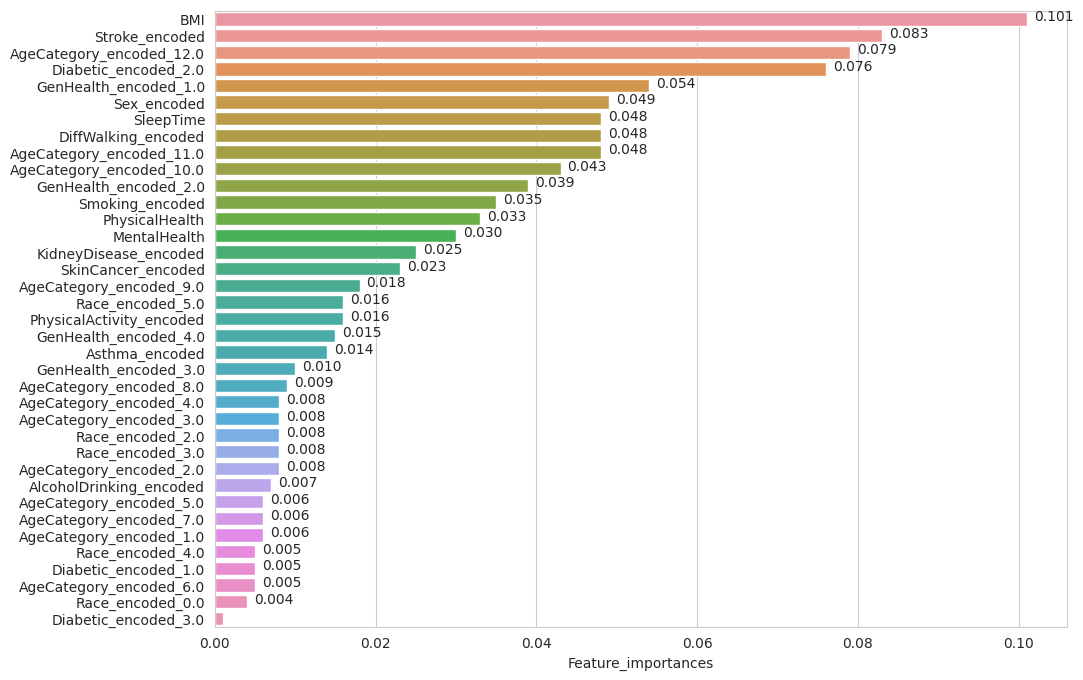

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 10))

fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

## **※연속 변수 타겟 표준화**

In [ ]:
dft = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/train.csv')
dfv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/test.csv')

In [ ]:
dft.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [ ]:
dfv.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [ ]:
dft.info(), dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            505 non-null    int64  
 1   baths           505 non-null    float64
 2   size            505 non-null    float64
 3   size_units      505 non-null    object 
 4   l

(None, None)

In [ ]:
dft.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [ ]:
dfv.isnull().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [ ]:
print(dft['size_units'].unique())
print(dfv['size_units'].unique())
print(dft['lot_size_units'].unique())
print(dfv['lot_size_units'].unique())

['sqft']
['sqft']
['sqft' 'acre' nan]
['sqft' 'acre' nan]


In [ ]:
#size_units의 값이 하나의 범주만 있으므로 제거
dft = dft.drop('size_units', axis=1)
dfv = dfv.drop('size_units', axis=1)

In [ ]:
#zip_code 변수 제거
dft = dft.drop('zip_code', axis=1)
dfv = dfv.drop('zip_code', axis=1)

In [ ]:
print(dft.columns)
print(dfv.columns)

Index(['beds', 'baths', 'size', 'lot_size', 'lot_size_units', 'price'], dtype='object')
Index(['beds', 'baths', 'size', 'lot_size', 'lot_size_units', 'price'], dtype='object')


In [ ]:
dft.loc[dft['lot_size_units'] == 'acre', 'lot_size'] = dft.loc[dft['lot_size_units'] == 'acre', 'lot_size'] * 43560
dfv.loc[dfv['lot_size_units'] == 'acre', 'lot_size'] = dfv.loc[dfv['lot_size_units'] == 'acre', 'lot_size'] * 43560

In [ ]:
dft.head()

,beds,baths,size,lot_size,lot_size_units,price
0,3,2.5,2590.0,6000.0,sqft,795000.0
1,4,2.0,2240.0,13503.6,acre,915000.0
2,4,3.0,2040.0,3783.0,sqft,950000.0
3,4,3.0,3800.0,5175.0,sqft,1950000.0
4,2,2.0,1042.0,NaN,NaN,950000.0


In [ ]:
dfv.head()

,beds,baths,size,lot_size,lot_size_units,price
0,3,3.0,2850.0,4200.0,sqft,1175000.0
1,4,5.0,3040.0,5002.0,sqft,1057500.0
2,3,1.0,1290.0,6048.0,sqft,799000.0
3,3,2.0,2360.0,12196.8,acre,565000.0
4,3,3.5,1942.0,1603.0,sqft,1187000.0


In [ ]:
#lot_size를 모두 sqft단위로 맞춘 후 lot_size_units 제거
dft = dft.drop('lot_size_units', axis=1)
dfv = dfv.drop('lot_size_units', axis=1)

In [ ]:
print(dft.columns)
print(dfv.columns)

Index(['beds', 'baths', 'size', 'lot_size', 'price'], dtype='object')
Index(['beds', 'baths', 'size', 'lot_size', 'price'], dtype='object')


In [ ]:
#lot_size 결측치를 평균값으로 대체
#또는 아래 코드를 이용해 제거 가능
#dft1 = dft.dropna()
#dfv1 = dfv.dropna()

lot_size_mean_t = dft['lot_size'].mean()
lot_size_mean_v = dft['lot_size'].mean()
dft['lot_size'].fillna(lot_size_mean_t, inplace=True)
dfv['lot_size'].fillna(lot_size_mean_v, inplace=True)

In [ ]:
dft.isnull().sum()

beds        0
baths       0
size        0
lot_size    0
price       0
dtype: int64

In [ ]:
dfv.isnull().sum()

beds        0
baths       0
size        0
lot_size    0
price       0
dtype: int64

In [ ]:
# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfts = pd.DataFrame(scaler.fit_transform(dft))
dfvs = pd.DataFrame(scaler.fit_transform(dfv))

# StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터프레임에 다시 변수명을 넣는다.
dfts.columns = dft.columns
dfvs.columns = dfv.columns
dfts.head()

,beds,baths,size,lot_size,price
0,0.113455,0.339428,0.928639,-0.048811,-0.178655
1,0.910407,-0.159687,0.548165,-0.020175,-0.051517
2,0.910407,0.838542,0.330751,-0.057272,-0.014436
3,0.910407,0.838542,2.243994,-0.051960,1.045042
4,-0.683497,-0.159687,-0.754144,0.000000,-0.014436


In [ ]:
dfvs.head()

,beds,baths,size,lot_size,price
0,0.037524,0.770642,1.083019,-0.352134,0.321478
1,0.861421,2.746145,1.289173,-0.307018,0.128181
2,0.037524,-1.204861,-0.609611,-0.248176,-0.297072
3,0.037524,-0.217110,0.551360,0.097721,-0.682021
4,0.037524,1.264518,0.097822,-0.498227,0.341219


In [ ]:
#dfts.to_csv('/content/drive/MyDrive/Colab Notebooks/project/train1_standard.csv', index=False)
#dfvs.to_csv('/content/drive/MyDrive/Colab Notebooks/project/test1_standard.csv', index=False)

## **※연속 변수 회귀 모델**

In [ ]:
#train.csv는 train data로, test.csv는 validation data로 사용

X_train = dfts.drop('price', axis=1)
y_train = dfts['price']

X_test = dfvs.drop('price', axis=1)
y_test = dfvs['price']

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (2016, 4) (2016,)
Test shape: (505, 4) (505,)


In [ ]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set r2 score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set r2 score:0.20610
Linear Regression Test set r2 score:0.45984


## **※Ridge 모델**

In [ ]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.20610
Linear Regression Test set score:0.45970


In [ ]:
from sklearn.linear_model import Ridge
clf_Ridge = Ridge()

In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
# 'lbfgs'는 'positive' 매개변수가 True로 설정된 경우에만 사용가능 하다는 warning, 'lbfgs'를 추가해도 fitting에 실패하여 제거함
params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga']}

grid_Ridge = GridSearchCV(clf_Ridge, param_grid=params, scoring='r2', cv=5,n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits
GridSearchCV max score:0.39174
GridSearchCV best parameter: {'alpha': 0.001, 'solver': 'sparse_cg'}


In [ ]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))

R2 Score on test set:0.45984


## **※XGBoost 모델**

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
#standardization되지 않은 dft, dfv 사용
dft.head(3)

,beds,baths,size,lot_size,price
0,3,2.5,2590.0,6000.0,795000.0
1,4,2.0,2240.0,13503.6,915000.0
2,4,3.0,2040.0,3783.0,950000.0


In [ ]:
dfv.head(3)

,beds,baths,size,lot_size,price
0,3,3.0,2850.0,4200.0,1175000.0
1,4,5.0,3040.0,5002.0,1057500.0
2,3,1.0,1290.0,6048.0,799000.0


In [ ]:
#XGBoost 모델과 LightGBM모델의 r2 score 값이 음수가 나와 log transform

dftl = dft.transform(lambda x: np.log(x+1))
dfvl = dfv.transform(lambda x: np.log(x+1))

X_train = dftl.drop('price', axis=1)
y_train = dftl['price']

X_test = dfvl.drop('price', axis=1)
y_test = dfvl['price']

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (2016, 4) (2016,)
Test shape: (505, 4) (505,)


In [ ]:
# 기본 XGBRegressor 모델
from sklearn.metrics import r2_score

xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.56824


In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [16],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.8, 0.9]
              }

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [16], 'min_child_weight': [4],
                         'n_estimators': [1000], 'subsample': [0.8, 0.9]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.9}


In [ ]:
model = xgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.49864


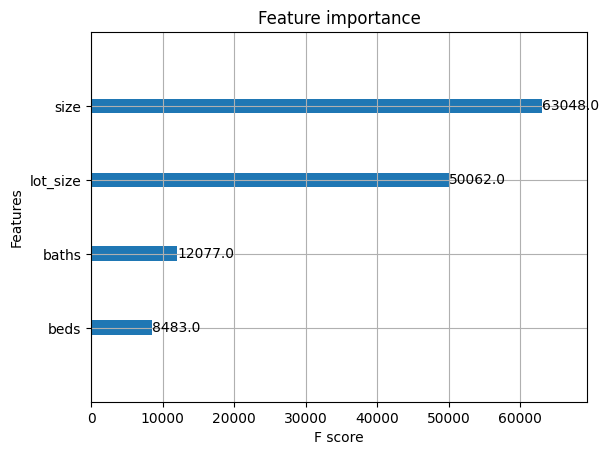

In [ ]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10);

## **※LightGBM 모델**

In [ ]:
# 기본 lGBMRegressor 모델
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgb = LGBMRegressor(random_state=0)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.60720


In [ ]:
#그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

parameters = {'colsample_bytree': [0.7, 0.8],
              'learning_rate': [0.1, 0.15, 0.2],
              'max_depth': [11],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.3, 0.4]
              }

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
lgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.1, 0.15, 0.2], 'max_depth': [11],
                         'min_child_weight': [4], 'n_estimators': [1000],
                         'subsample': [0.3, 0.4]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', lgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.3}


In [ ]:
from sklearn.metrics import r2_score

model = lgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.52124


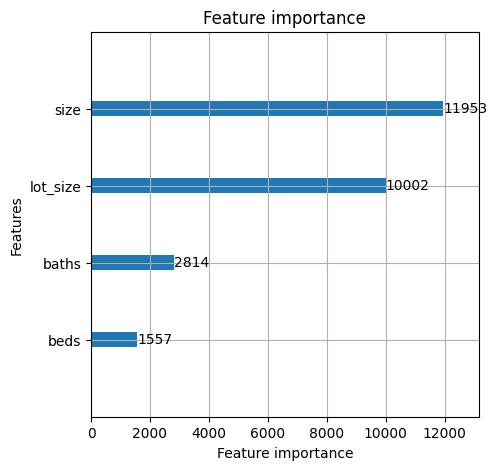

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
plot_importance(model, ax=ax);